# Word Trends

Der Code basiert auf:

Karsdorp, Folgert / Kestemont, Mike / Riddel, Allen, Humanities Data Analysis. Case Studies with Python, Princeton University Press 2021, S. 21.

[Link zum Code im Jupyter Book](https://www.humanitiesdataanalysis.org/introduction-cook-books/notebook.html#cooking-with-tabular-data)

In [1]:
import scipy.stats

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../data/word-counts-for-word-trends.csv')

In [3]:
df = df.set_index('year')

In [4]:
def plot_trend(column, df, style='o', line_color='grey', xlim=(2009.5, 2022.5), ylim=False):
    slope, intercept, _, _, _ = scipy.stats.linregress(
        df.index, df[column].fillna(0).values)
    ax = df[column].plot(style=style, label=column, figsize=(12,8))
    ax.plot(df.index, intercept + slope * df.index, '--',
             color=line_color, label='_nolegend_')
    ax.set_ylabel("frequency")
    ax.set_xlabel("year")
    ax.set_xlim(xlim)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if ylim == True:
        ax.set_ylim((-5, df[column].values.max() + 5))

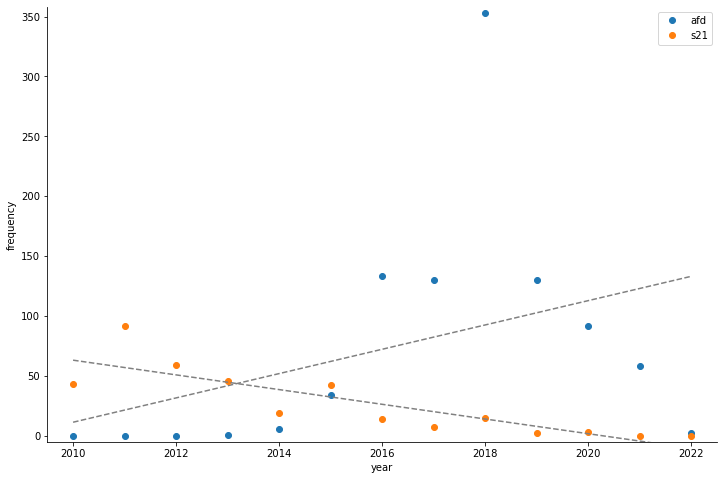

In [5]:
plot_trend('afd', df, ylim=True)
plot_trend('s21', df)
plt.legend();